In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.mlab as mlab


In [2]:
classpath = 'dataset3/variant_11.csv'

data = pd.read_csv(classpath)
data.head()

,couple_1_1,couple_1_2,couple_2_1,couple_2_2,couple_3_1,couple_3_2,couple_4_1,couple_4_2,couple_5_1,couple_5_2,couple_6_1,couple_6_2
0,1414.896639,1017.892561,1112.377280,965.532247,8.857552,-367.352989,-814.041392,1079.859814,486.548484,1200.045788,-118.697117,-239.492738
1,853.831861,942.443883,364.401621,19.561723,573.738115,-331.871554,-924.284091,1477.229246,1287.686720,245.627898,-556.376165,-271.184697
2,712.035258,1283.049464,14.864356,-288.554821,-111.860026,-300.769741,-1302.881348,1498.473424,833.001906,66.701555,-353.539188,-115.727678
3,866.691799,915.608080,-315.320184,-127.177934,375.229312,-344.184664,-827.458980,838.079591,-272.523836,1066.637270,-699.617873,-535.134941
4,850.466614,970.363128,12.012701,89.195336,781.409985,-361.021337,-1315.545692,1113.648721,322.296472,517.100837,-35.511559,-295.289103


In [3]:
#Исследуем  на нормальность

normality = []

for i in range(12):
    shapiro_test = stats.shapiro(data.values[i])
    # Perform the Shapiro-Wilk test for normality.
    # The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
    # Критерий Шапиро-Уилка основан на оптимальной линейной несмещённой оценке дисперсии к её обычной оценке
    print(f"Опыт {i}\n Статистика = {shapiro_test.statistic}, P-value = {shapiro_test.pvalue}")
    alpha_level = 0.05
    if shapiro_test.pvalue > alpha_level:
        normality.append(1)
        print('Гипотеза о нормальности подтверждена\n')
    else:
        normality.append(0)
        print('Гипотеза о нормальности опровергнута\n')

print(normality)

Опыт 0
 Статистика = 0.9004973769187927, P-value = 0.16098113358020782
Гипотеза о нормальности подтверждена

Опыт 1
 Статистика = 0.976563036441803, P-value = 0.966132402420044
Гипотеза о нормальности подтверждена

Опыт 2
 Статистика = 0.9354091286659241, P-value = 0.4409785568714142
Гипотеза о нормальности подтверждена

Опыт 3
 Статистика = 0.8851795196533203, P-value = 0.10214515775442123
Гипотеза о нормальности подтверждена

Опыт 4
 Статистика = 0.9411247372627258, P-value = 0.5127795934677124
Гипотеза о нормальности подтверждена

Опыт 5
 Статистика = 0.9556024670600891, P-value = 0.7197035551071167
Гипотеза о нормальности подтверждена

Опыт 6
 Статистика = 0.9455615282058716, P-value = 0.5732679963111877
Гипотеза о нормальности подтверждена

Опыт 7
 Статистика = 0.9668709635734558, P-value = 0.8754250407218933
Гипотеза о нормальности подтверждена

Опыт 8
 Статистика = 0.9306089878082275, P-value = 0.38661184906959534
Гипотеза о нормальности подтверждена

Опыт 9
 Статистика = 0.9135

In [32]:
#T-критерий
for i in range(12):
    if i % 2 == 0:
        if normality[i] == 1 and normality[i + 1] == 1:
            t_test = scp.stats.ttest_ind(data.values[i], data.values[i + 1])
            print(f"Couple {i}\nStatistic = {t_test.statistic}, P-value = {t_test.pvalue}")
            alpha = 0.05
            if t_test.pvalue > alpha:
                print('Нулевая Гипотеза верна\n')
            else:
                print('Нулевая Гипотеза не верна\n')

Couple 0
Statistic = 0.5623791028514818, P-value = 0.5795436068555684
Нулевая Гипотеза верна

Couple 2
Statistic = 0.27388756444919143, P-value = 0.7867261087211523
Нулевая Гипотеза верна

Couple 4
Statistic = 1.0493322856957017, P-value = 0.3054164662230141
Нулевая Гипотеза верна

Couple 6
Statistic = 0.3627177715456579, P-value = 0.7202771967976247
Нулевая Гипотеза верна

Couple 8
Statistic = -0.4299901484944019, P-value = 0.6713853432636614
Нулевая Гипотеза верна

Couple 10
Statistic = -0.8144630316366287, P-value = 0.42410875629385014
Нулевая Гипотеза верна



In [33]:
#Z-критерий (1а)

for i in range(12):
    if i % 2 == 0:
        if normality[i] == 1 and normality[i + 1] == 1:
            z_test = stests.ztest(data.values[i], data.values[i + 1])
            print(f"Couple {i}\nStatistic = {z_test[0]}, P-value = {z_test[1]}")
            if z_test[1] > alpha:
                print('Нулевая Гипотеза верна\n')
            else:
                print('Нулевая Гипотеза не верна\n')

Couple 0
Statistic = 0.5623791028514818, P-value = 0.5738577537346548
Нулевая Гипотеза верна

Couple 2
Statistic = 0.27388756444919143, P-value = 0.7841710284445291
Нулевая Гипотеза верна

Couple 4
Statistic = 1.0493322856957017, P-value = 0.29402521155716144
Нулевая Гипотеза верна

Couple 6
Statistic = 0.3627177715456579, P-value = 0.7168157227835105
Нулевая Гипотеза верна

Couple 8
Statistic = -0.4299901484944019, P-value = 0.6672028074592342
Нулевая Гипотеза верна

Couple 10
Statistic = -0.8144630316366285, P-value = 0.41537974213701523
Нулевая Гипотеза верна



In [49]:
#Манна–Уитни критерий (1a)
#Критерий Манна-Уитни представляет непараметрическую альтернативу t-критерия для независимых выборок.
for i in range(12):
    if i % 2 == 0:
        if normality[i] == 1 and normality[i + 1] == 0 or normality[i] == 0 and normality[i + 1] == 1:
            mannwhitneyu_test = scp.stats.mannwhitneyu(data.values[i], data.values[i + 1])
            print(f"Couple {i}\nStatistic = {mannwhitneyu_test[0]}, P-value = {mannwhitneyu_test[1]}")
            if mannwhitneyu_test[1] > alpha:
                print('Нулевая Гипотеза верна\n')
            else:
                print('Нулевая Гипотеза не верна\n')

In [50]:
#Ансари критерий (1б)

for i in range(12):
    if i % 2 == 0:
        if normality[i] == 1 and normality[i + 1] == 0 or normality[i] == 0 and normality[i + 1] == 1:
            ansari_test = scp.stats.ansari(data.values[i], data.values[i + 1])
            print(f"Couple {i}\nStatistic = {ansari_test[0]}, P-value = {ansari_test[1]}")
            if ansari_test[1] > alpha:
                print('Нулевая Гипотеза верна\n')
            else:
                print('Нулевая Гипотеза не верна\n')

In [43]:
variance1, variance2 = np.var(data.values[1]), np.var(data.values[2])
F = max([variance1 / variance2, variance2 / variance1])
dfd, dfn = sorted([len(data.values[2]) - 1, len(data.values[2]) - 1])
p_value = scp.stats.f.sf(F, dfn, dfd)
if p_value > alpha:
    print('по критерию Фишера принимаем нулевую гипотезу\n')
else:
    print('по критерию Фишера не принимаем нулевую гипотезу\n')

по критерию Фишера принимаем нулевую гипотезу



In [47]:
#Левене критерий (1б)

for i in range(12):
    if i % 2 == 0:
        if normality[i] == 1 and normality[i + 1] == 0 or normality[i] == 0 and normality[i + 1] == 1:
            ansari_test = scp.stats.levene(data.values[i], data.values[i + 1])
            print(f"Couple {i}\nStatistic = {ansari_test[0]}, P-value = {ansari_test[1]}")
            if ansari_test[1] > alpha:
                print('Нулевая Гипотеза верна\n')
            else:
                print('Нулевая Гипотеза не верна\n')

In [48]:
#Бартлетт критерий (2)

bartlett_test =  scp.stats.bartlett(data.values[0], data.values[1], data.values[2], data.values[3], data.values[4], data.values[5], data.values[6], data.values[7], data.values[8], data.values[9], data.values[10])
print(f"Bartlett test {bartlett_test}")
if bartlett_test[1] > alpha:
    print('Нулевая Гипотеза верна\n')
else:
    print('Нулевая Гипотеза не верна\n')

Bartlett test BartlettResult(statistic=1.2027047388950014, pvalue=0.9996014907401446)
Нулевая Гипотеза верна



In [11]:
#Левене критерий (2)

levene_test =  scp.stats.levene(data.values[0], data.values[1], data.values[2], data.values[3], data.values[4], data.values[5], data.values[6], data.values[7], data.values[8], data.values[9], data.values[10])
print(f"levene test {levene_test}")
if levene_test[1] > alpha:
    print('Нулевая Гипотеза верна\n')
else:
    print('Нулевая Гипотеза не верна\n')

levene test LeveneResult(statistic=0.16097797869959687, pvalue=0.9983806327869832)
Нулевая Гипотеза верна



Sample 0
Statistic = 0.41301512718200684, P-value = 7.413095202794817e-13
Отклонить гипотезу о нормальности

Sample 1
Statistic = 0.1290310025215149, P-value = 1.2101266432264202e-15
Отклонить гипотезу о нормальности

Sample 2
Statistic = 0.1652093529701233, P-value = 2.4946744482315505e-15
Отклонить гипотезу о нормальности

Sample 3
Statistic = 0.1936134696006775, P-value = 4.474864895949102e-15
Отклонить гипотезу о нормальности

Sample 4
Statistic = 0.1257157325744629, P-value = 1.1337777403388778e-15
Отклонить гипотезу о нормальности

Sample 5
Statistic = 0.2714855670928955, P-value = 2.4087330030954715e-14
Отклонить гипотезу о нормальности

Sample 6
Statistic = 0.1265941858291626, P-value = 1.1535029142189439e-15
Отклонить гипотезу о нормальности

Sample 7
Statistic = 0.3495110869407654, P-value = 1.491291492421512e-13
Отклонить гипотезу о нормальности

Sample 8
Statistic = 0.12569046020507812, P-value = 1.1332122399674671e-15
Отклонить гипотезу о нормальности

Sample 9
Statistic =

c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


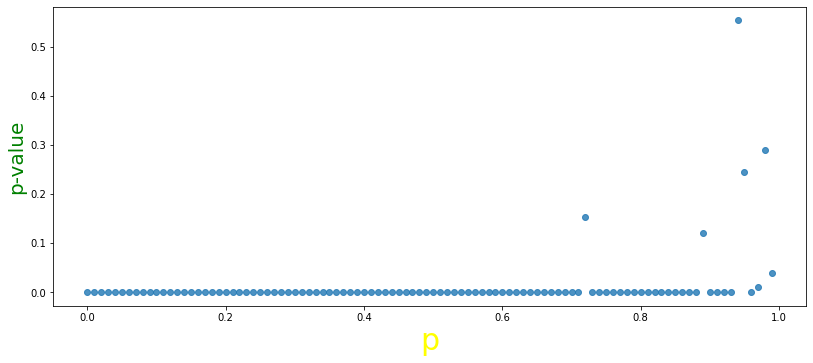

In [14]:
mu, sigma = 0, 1

array = []
itt = 0
array_for_displot = []

for p in np.arange(0, 1, 0.01):
    zuppo = np.random.choice(2, 50, p=[p, 1 - p])
    array.append([])

    for i in range(len(zuppo)):
        if zuppo[i] == 1:
            array[itt].append(np.random.f(1,1))
        else:
            array[itt].append(np.random.normal(mu, sigma, 1))

    shapiro_test = stats.shapiro(array[itt])
    print(f"Sample {itt}\nStatistic = {shapiro_test.statistic}, P-value = {shapiro_test.pvalue}")
    alpha = 0.05
    if shapiro_test.pvalue > alpha:
        print('Принять гипотезу о нормальности\n')
    else:
        print('Отклонить гипотезу о нормальности\n')

    array_for_displot.append(shapiro_test.pvalue)

    itt += 1

# print(len(array_for_displot))

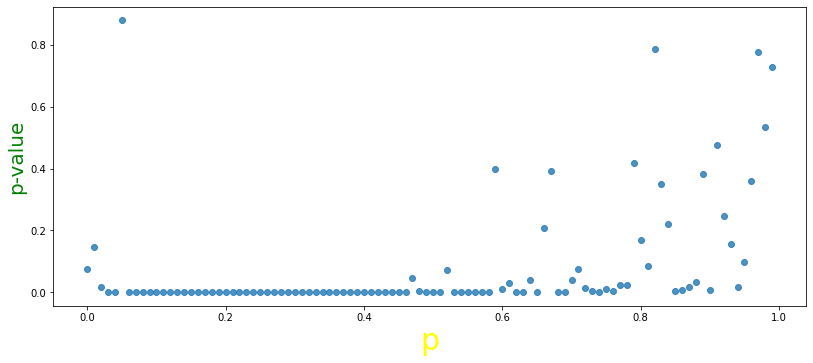

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(13.5, 5.5)
f = sns.regplot(x=[p for p in np.arange(0, 1, 0.01)], y=array_for_displot, fit_reg=False)
f.xaxis.label.set_color("yellow")
f.yaxis.label.set_color("green")
f.set_xlabel("p",fontsize=30)
f.set_ylabel("p-value",fontsize=20)
plt.show()